In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import operator
from functools import reduce
import pandas_profiling as pp

In [2]:
matches = pd.read_csv('C:/Users/Acer/Desktop/Ipl/matches.csv')
delivery = pd.read_csv('C:/Users/Acer/Desktop/Ipl/deliveries.csv')

In [3]:
import pandas_profiling as pp

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
to_drop = ['umpire1','umpire2','umpire3']
matches.drop(to_drop, inplace=True,axis=1)           

In [6]:
matches.shape

(756, 15)

In [7]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
dtype: object

In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
## Filling null values city,Winner,player of match

In [10]:
#matched [pd.isnull(matches["city"])]


In [11]:
len(matches['team1'].unique().tolist())

15

In [12]:
len(matches['team2'].unique().tolist())

15

In [13]:
matches.city.fillna('Dubai International Stadium',inplace=True)

In [14]:
matches[pd.isnull(matches["city"])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue


In [15]:
matches[pd.isnull(matches["winner"])]
#no data in google as welld

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [16]:
matches.winner.fillna('Draw',inplace=True)
#df.loc[df['id'].isin([301,546,11340]),'winner']="Draw"

In [17]:
matches[pd.isnull(matches["player_of_match"])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,Draw,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Draw,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,Draw,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,Draw,0,0,NaN,M. Chinnaswamy Stadium


In [18]:
matches.player_of_match.fillna('Draw',inplace=True)

In [19]:
matches[pd.isnull(matches["player_of_match"])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue


In [20]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    756 non-null object
venue              756 non-null object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [21]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [22]:
#total matches played
len(matches.index)

756

In [23]:
#no of unique team in team1
len(matches['team1'].unique().tolist())

15

In [24]:
team1uni = matches['team1'].unique().tolist()
team1uni

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Lions',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Rising Pune Supergiants',
 'Delhi Capitals']

In [25]:
#no of unique team in team 2
#len(matches['team1'].unique().tolist())

In [26]:
#team2uni = matches['team1'].unique().tolist()
#team2uni

In [27]:
#to check whether the data is available vice versa or not
matches.loc[(matches["date"] == "2017-04-05"),:]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


In [28]:
#to find total number of unique team
#Totalteams = list(set(team1uni).union(set(team2uni)))
#Totalteams
matches.to_csv('edited_matches.csv',index=False)
#finaldf.to_csv('output.csv',index=False,header=None)

In [29]:
Matches_Played_Venue = matches.groupby(['venue']).size().reset_index(name='played_counts')
#Matches_Played_Venue = Matches_in_venue.groupby(['team1','venue']).size().reset_index(name='played_counts')
#matches_Played_Venue.sort_values(by = ['venue','team1','played_counts'],ascending=False)
Matches_Played_Venue.sort_values(by = ['venue'])

,venue,played_counts
0,ACA-VDCA Stadium,2
1,Barabati Stadium,7
2,Brabourne Stadium,11
3,Buffalo Park,3
4,De Beers Diamond Oval,3
5,Dr DY Patil Sports Academy,17
6,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11
7,Dubai International Cricket Stadium,7
8,Eden Gardens,77
9,Feroz Shah Kotla,67


In [30]:
matches = matches.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',regex=True)
matches = matches.replace(to_replace='Rising Pune Supergiants',value='Rising Pune Supergiant',regex=True)
matches = matches.replace(to_replace='Feroz Shah Kotla Ground',value='Feroz Shah Kotla',regex=True)
matches = matches.replace(to_replace='M. Chinnaswamy Stadium',value='M. Chinnaswamy Stadium',regex=True)
matches = matches.replace(to_replace='Rajiv Gandhi Intl. Cricket Stadium',value='Rajiv Gandhi International Stadium,Uppal',regex=True)
matches = matches.replace(to_replace='M.A. Chidambaram Stadium',value='MA. Chidambaram Stadium,Chepauk',regex=True)
matches = matches.replace(to_replace='M. Chinnaswamy Stadium',value='M. Chinnaswamy Stadium',regex=True)
matches = matches.replace(to_replace='Bengaluru',value='Bengaluru',regex=True)
matches.reset_index(inplace=True)


In [31]:
matches = matches.replace(to_replace = 'RG Sharma',value ='R Sharma', regex = True)
matches = matches.replace(to_replace = 'C Ingram',value = 'CA Ingram', regex = True)
matches = matches.replace(to_replace = 'G Vihari',value = 'GH Vihari', regex = True)

In [32]:
matches = matches.replace(to_replace = 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',value ='Rajasekhara Reddy Stadium', regex = True)
matches = matches.replace(to_replace = 'ACA-VDCA Stadium',value ='Rajasekhara Reddy Stadium', regex = True)
matches = matches.replace(to_replace = 'MA Chidambaram Stadium, Chepauk',value ='M. A. Chidambaram Stadium', regex = True)
matches = matches.replace(to_replace = 'Rajiv Gandhi International Stadium, Uppal',value ='Rajiv Gandhi International Stadium,Uppal', regex = True)
matches = matches.replace(to_replace = 'M. Chinnaswamy Stadium',value ='M.Chinnaswamy Stadium', regex = True)
matches = matches.replace(to_replace = 'Subrata Roy Sahara Stadium',value ='Maharashtra Cricket Association Stadium', regex = True)

In [33]:
#matches[matches['venue'].str.contains("Punjab Cricket Association")][['venue']]
matches.venue[matches.venue.str.contains('Punjab Cricket Association')] = 'Punjab Cricket Association'
matches.venue[matches.venue.str.contains('IS Bindra Stadium')] = 'Rajasekhara Reddy Stadium'
matches.venue[matches.venue.str.contains('Dr.Y.S. Rajashekhara Reddy ACA-VDCA Cricket')] = 'Rajasekhara Redy Stadium'
matches.venue[matches.venue.str.contains('M.A. Chidambaram Stadium')] = 'MA. Chidambaram Stadium,Chepauk'

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a Da

In [34]:
Matches_Played_Venue = matches.groupby(['venue']).size().reset_index(name='played_counts')
#Matches_Played_Venue = Matches_in_venue.groupby(['team1','venue']).size().reset_index(name='played_counts')
#matches_Played_Venue.sort_values(by = ['venue','team1','played_counts'],ascending=False)
Matches_Played_Venue.sort_values(by = ['venue'])

,venue,played_counts
0,Barabati Stadium,7
1,Brabourne Stadium,11
2,Buffalo Park,3
3,De Beers Diamond Oval,3
4,Dr DY Patil Sports Academy,17
5,Dubai International Cricket Stadium,7
6,Eden Gardens,77
7,Feroz Shah Kotla,74
8,Green Park,4
9,Himachal Pradesh Cricket Association Stadium,9


In [35]:
Team_exc = ['Rising Pune Supergiants','Gujarat Lions','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
matches = matches[~matches["team1"].isin(Team_exc)]
matches = matches[~matches["team2"].isin(Team_exc)]
matches.reset_index(inplace=True)

In [36]:
matches.head()

,level_0,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium,Uppal"
1,4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
2,6,6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
3,7,7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
4,9,9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium


In [37]:
Team1_total_matches = pd.DataFrame(matches.groupby(matches.team1).team1.count())
Team1_total_matches.rename(columns = {'team1':'Team1_Played'},inplace=True)
Team1_total_matches.reset_index(inplace=True)
Team1_total_matches.rename(columns = {'team1':'Team'},inplace=True)
Team1_total_matches

,Team,Team1_Played
0,Chennai Super Kings,83
1,Deccan Chargers,39
2,Delhi Daredevils,70
3,Kings XI Punjab,83
4,Kolkata Knight Riders,76
5,Mumbai Indians,92
6,Rajasthan Royals,64
7,Royal Challengers Bangalore,76
8,Sunrisers Hyderabad,58


In [38]:
Team2_total_matches = pd.DataFrame(matches.groupby(matches.team2).team2.count())
Team2_total_matches.rename(columns = {'team2':'Team2_Played'},inplace=True)
Team2_total_matches.reset_index(inplace=True)
Team2_total_matches.rename(columns = {'team2':'Team'},inplace=True)
Team2_total_matches

,Team,Team2_Played
0,Chennai Super Kings,73
1,Deccan Chargers,31
2,Delhi Daredevils,91
3,Kings XI Punjab,78
4,Kolkata Knight Riders,87
5,Mumbai Indians,78
6,Rajasthan Royals,76
7,Royal Challengers Bangalore,88
8,Sunrisers Hyderabad,39


In [39]:
teams = matches.team1.append(matches.team2)


In [40]:
teams_df = pd.DataFrame(teams)

In [41]:
teams_df.columns = ['team']

In [42]:
# Total number played
Total_match_played = teams_df.groupby(teams_df.team).team.count()
Total_match_played_df = pd.DataFrame(Total_match_played)
Total_match_played_df.columns = ['countplayed']
Total_match_played_df
Total_match_played_df.reset_index(inplace=True) 
Total_match_played_df

,team,countplayed
0,Chennai Super Kings,156
1,Deccan Chargers,70
2,Delhi Daredevils,161
3,Kings XI Punjab,161
4,Kolkata Knight Riders,163
5,Mumbai Indians,170
6,Rajasthan Royals,140
7,Royal Challengers Bangalore,164
8,Sunrisers Hyderabad,97


In [43]:
totalnumberofmatches_merge = pd.merge(Team1_total_matches,Team2_total_matches,how='outer',on='Team')
totalnumberofmatches_merge


,Team,Team1_Played,Team2_Played
0,Chennai Super Kings,83,73
1,Deccan Chargers,39,31
2,Delhi Daredevils,70,91
3,Kings XI Punjab,83,78
4,Kolkata Knight Riders,76,87
5,Mumbai Indians,92,78
6,Rajasthan Royals,64,76
7,Royal Challengers Bangalore,76,88
8,Sunrisers Hyderabad,58,39


In [44]:
## Add the values of Columns Team2 and Team1
totalnumberofmatches_merge['TotalMatchesPlayed'] = totalnumberofmatches_merge['Team1_Played'].add(totalnumberofmatches_merge['Team2_Played'])
totalnumberofmatches_merge.sort_values(ascending=False,by='TotalMatchesPlayed')

,Team,Team1_Played,Team2_Played,TotalMatchesPlayed
5,Mumbai Indians,92,78,170
7,Royal Challengers Bangalore,76,88,164
4,Kolkata Knight Riders,76,87,163
2,Delhi Daredevils,70,91,161
3,Kings XI Punjab,83,78,161
0,Chennai Super Kings,83,73,156
6,Rajasthan Royals,64,76,140
8,Sunrisers Hyderabad,58,39,97
1,Deccan Chargers,39,31,70


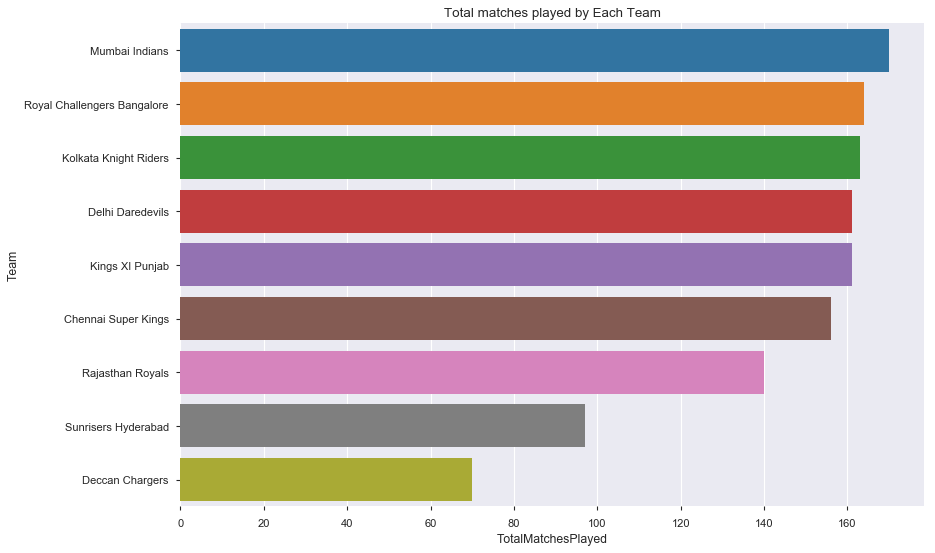

In [45]:
#Visualise the  data using the Bar plot
plt.figure(num=None,figsize=(12,8),dpi=80,facecolor='w',edgecolor='k')
sns.barplot(x='TotalMatchesPlayed',y='Team',data=totalnumberofmatches_merge.sort_values(ascending=False,by='TotalMatchesPlayed'))
plt.title('Total matches played by Each Team')
plt.show()

In [46]:
#Total_match_Played_df.sort_values('item')

In [47]:
#total wins
#Total_wins = matches.groupby(matches.winner).winner.count()
#Total_wins_df = pd.DataFrame(Total_wins)
#Total_wins_df.columns = {'Win_count'}
#Total_wins_df.reset_index(inplace=True)

In [48]:
#matches.rename(columns = ('id':'Match_no1'),inplace=True)
#matches.head()

In [49]:
matches['Match_No'] = 'Match_' +matches['id'].astype(str)
#matches.drop('Match_no',inplace=True,axis=1)
matches.head()
matches.set_index('Match_No')

,level_0,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
Match_No,,,,,,,,,,,,,,,,,
Match_1,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium,Uppal"
Match_5,4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
Match_7,6,6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
Match_8,7,7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
Match_10,9,9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium
Match_11,10,10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens
Match_12,11,11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium
Match_14,13,13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens
Match_15,14,14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla


In [50]:
winner_matches = pd.DataFrame(matches[['Match_No','winner']].groupby('winner').agg('count').sort_values(ascending=False,by='Match_No'))
winner_matches

,Match_No
winner,
Mumbai Indians,100
Chennai Super Kings,95
Kolkata Knight Riders,84
Kings XI Punjab,74
Royal Challengers Bangalore,72
Rajasthan Royals,70
Delhi Daredevils,68
Sunrisers Hyderabad,50
Deccan Chargers,25


In [51]:
# Adding Team as column as we have to do label based indexing operations
#winner_matches['Team'] = winner.index
#winner_matches

In [52]:
#rename column match_no to No of wins
winner_matches.rename(columns = {'Match_No':'No_of_wins'},inplace=True)
winner_matches

,No_of_wins
winner,
Mumbai Indians,100
Chennai Super Kings,95
Kolkata Knight Riders,84
Kings XI Punjab,74
Royal Challengers Bangalore,72
Rajasthan Royals,70
Delhi Daredevils,68
Sunrisers Hyderabad,50
Deccan Chargers,25


In [53]:
#dropping Draw
winner_matches = winner_matches.drop(['Draw'])


In [54]:
winner_matches.reset_index(inplace=True)
winner_matches.rename(columns = {'winner':'Team'},inplace=True)


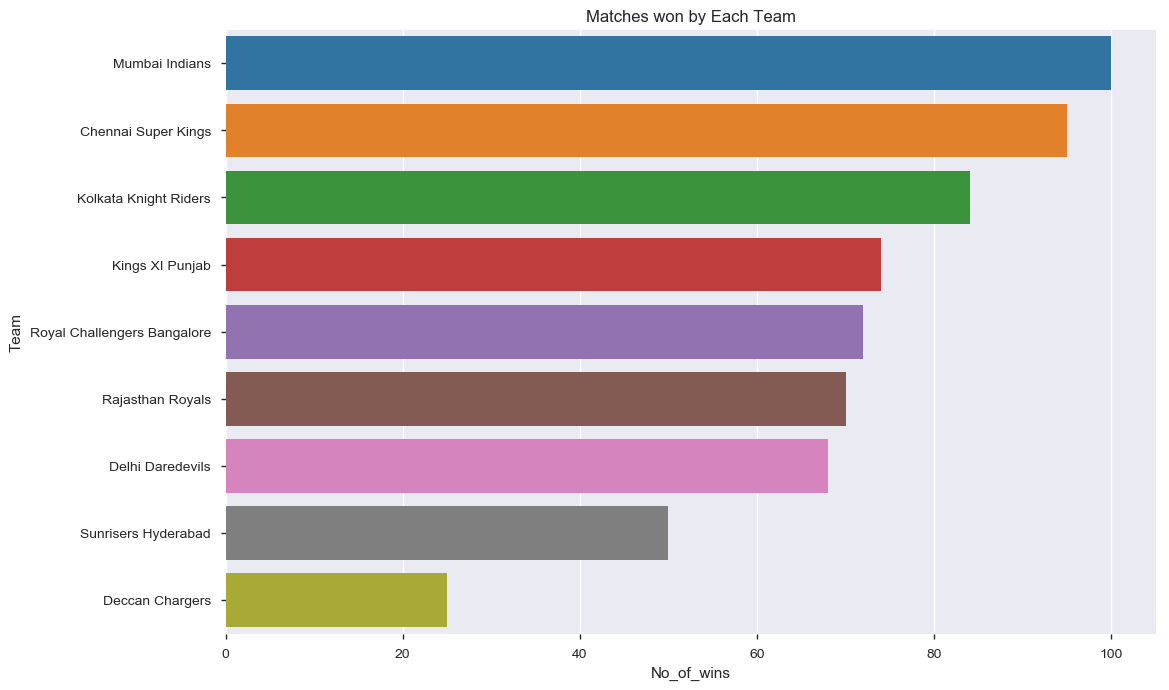

In [55]:
plt.figure(num=None,figsize=(12,8),dpi=100,facecolor='w',edgecolor='k')
sns.barplot(x='No_of_wins',y='Team',data=winner_matches)
plt.title('Matches won by Each Team')
plt.show()

In [56]:
matches.head()

,level_0,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Match_No
0,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium,Uppal",Match_1
1,4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Match_5
2,6,6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Match_7
3,7,7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,Match_8
4,9,9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Match_10


In [57]:
totalnumberofmatches_merge

,Team,Team1_Played,Team2_Played,TotalMatchesPlayed
0,Chennai Super Kings,83,73,156
1,Deccan Chargers,39,31,70
2,Delhi Daredevils,70,91,161
3,Kings XI Punjab,83,78,161
4,Kolkata Knight Riders,76,87,163
5,Mumbai Indians,92,78,170
6,Rajasthan Royals,64,76,140
7,Royal Challengers Bangalore,76,88,164
8,Sunrisers Hyderabad,58,39,97


In [58]:
#win percentage
totalnumberofmatches_merge_columnsfiltered=totalnumberofmatches_merge[['Team','TotalMatchesPlayed']]
#winner_matches
Teams_withwinpercentage=pd.merge(winner_matches,totalnumberofmatches_merge_columnsfiltered,how='inner',left_on='Team',right_on='Team')
Teams_withwinpercentage

,Team,No_of_wins,TotalMatchesPlayed
0,Mumbai Indians,100,170
1,Chennai Super Kings,95,156
2,Kolkata Knight Riders,84,163
3,Kings XI Punjab,74,161
4,Royal Challengers Bangalore,72,164
5,Rajasthan Royals,70,140
6,Delhi Daredevils,68,161
7,Sunrisers Hyderabad,50,97
8,Deccan Chargers,25,70


In [59]:
Teams_withwinpercentage['WinPercentage']=100*(Teams_withwinpercentage['No_of_wins']/Teams_withwinpercentage['TotalMatchesPlayed'])
Teams_withwinpercentage.sort_values(ascending=False,by='WinPercentage')

,Team,No_of_wins,TotalMatchesPlayed,WinPercentage
1,Chennai Super Kings,95,156,60.897436
0,Mumbai Indians,100,170,58.823529
7,Sunrisers Hyderabad,50,97,51.546392
2,Kolkata Knight Riders,84,163,51.533742
5,Rajasthan Royals,70,140,50.000000
3,Kings XI Punjab,74,161,45.962733
4,Royal Challengers Bangalore,72,164,43.902439
6,Delhi Daredevils,68,161,42.236025
8,Deccan Chargers,25,70,35.714286


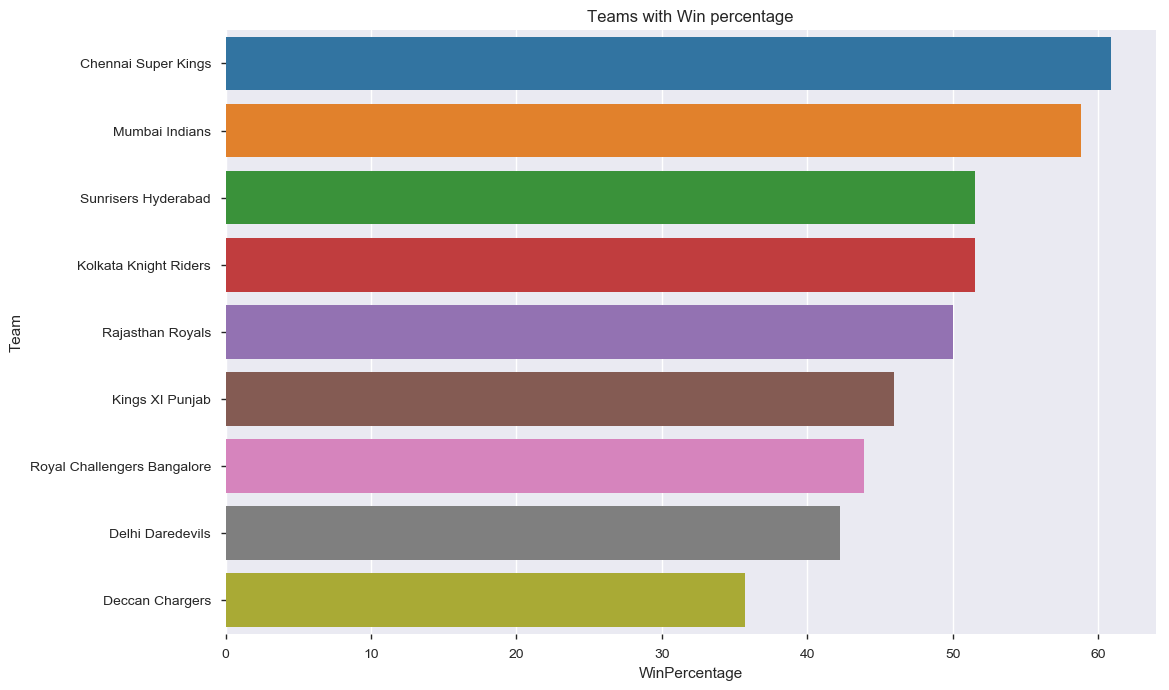

In [60]:
plt.figure(num=None,figsize=(12,8),dpi=100,facecolor='w',edgecolor='w')
sns.barplot(x='WinPercentage',y='Team',data=Teams_withwinpercentage.sort_values(ascending=False,by='WinPercentage'))
plt.title('Teams with Win percentage')
plt.show()


In [61]:
Teams_withwinpercentage.sort_values(ascending=False,by='WinPercentage')

,Team,No_of_wins,TotalMatchesPlayed,WinPercentage
1,Chennai Super Kings,95,156,60.897436
0,Mumbai Indians,100,170,58.823529
7,Sunrisers Hyderabad,50,97,51.546392
2,Kolkata Knight Riders,84,163,51.533742
5,Rajasthan Royals,70,140,50.000000
3,Kings XI Punjab,74,161,45.962733
4,Royal Challengers Bangalore,72,164,43.902439
6,Delhi Daredevils,68,161,42.236025
8,Deccan Chargers,25,70,35.714286


Text(0.5, 0.98, 'Graph showing number of matches played and number of matches won by teams')

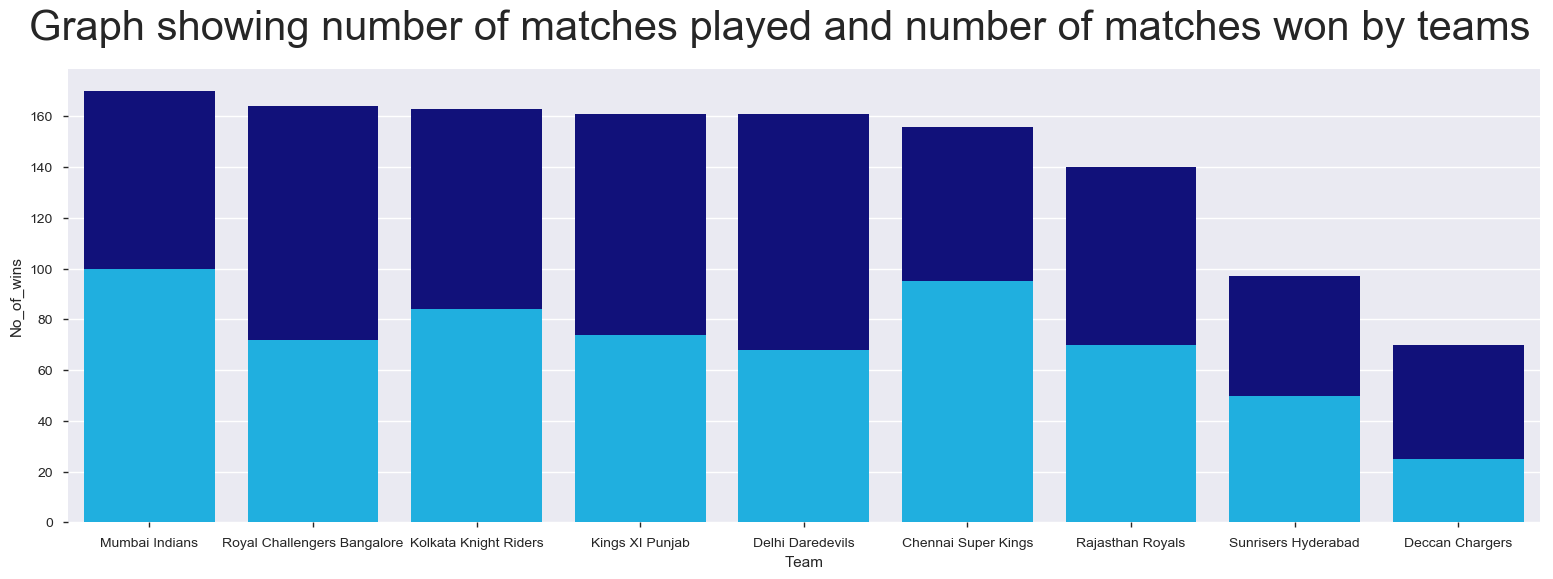

In [62]:
#my_dpi = 50
f,ax = plt.subplots(figsize=(19,6),dpi=100)
(sns.barplot(
    x="Team",
    y = "TotalMatchesPlayed",
    data = Teams_withwinpercentage.sort_values(by="TotalMatchesPlayed",ascending=False),
    color = "DarkBlue"
    ),
 sns.barplot(
     x="Team",
     y="No_of_wins",
     data=Teams_withwinpercentage.sort_values(by="TotalMatchesPlayed",ascending=False),
     color='DeepSkyBlue'
     ))

f.suptitle("Graph showing number of matches played and number of matches won by teams",fontsize=30)


In [63]:
#Total_wins_df.sort_valuyes('winner')

In [64]:
#Total_match_played_df.info()

In [65]:
#Venue
Venue = matches.groupby(['city','winner']).size().reset_index(name='Win_counts')
Venue_df =pd.DataFrame(Venue)
Venue_df

,city,winner,Win_counts
0,Abu Dhabi,Chennai Super Kings,1
1,Abu Dhabi,Kings XI Punjab,2
2,Abu Dhabi,Kolkata Knight Riders,1
3,Abu Dhabi,Rajasthan Royals,3
4,Ahmedabad,Delhi Daredevils,1
5,Ahmedabad,Kings XI Punjab,1
6,Ahmedabad,Mumbai Indians,1
7,Ahmedabad,Rajasthan Royals,7
8,Ahmedabad,Royal Challengers Bangalore,1
9,Ahmedabad,Sunrisers Hyderabad,1


In [66]:
Venue_df.sort_values(by=['city','winner'],ascending=False)


,city,winner,Win_counts
168,Visakhapatnam,Sunrisers Hyderabad,2
167,Visakhapatnam,Rajasthan Royals,1
166,Visakhapatnam,Mumbai Indians,2
165,Visakhapatnam,Kings XI Punjab,1
164,Visakhapatnam,Delhi Daredevils,2
163,Visakhapatnam,Chennai Super Kings,2
162,Sharjah,Royal Challengers Bangalore,1
161,Sharjah,Kolkata Knight Riders,1
160,Sharjah,Kings XI Punjab,2
159,Sharjah,Delhi Daredevils,1


In [67]:
matches.head()

,level_0,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Match_No
0,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium,Uppal",Match_1
1,4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Match_5
2,6,6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Match_7
3,7,7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,Match_8
4,9,9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Match_10


In [68]:
#to find winners in ground till graph visualization

Matches_in_venue1 = [matches[['team1','city']]].pop(0)
Matches_in_venue2 = [matches[['team2','city']]].pop(0)
Matches_in_venue22 = pd.DataFrame(Matches_in_venue1)
Matches_in_venue33 = pd.DataFrame(Matches_in_venue2)
Matches_in_venue33.columns = ['team1','city']
Matches_in_venue = Matches_in_venue22.append(Matches_in_venue33)

In [69]:
#in a single stadium played more than 10 matches
Matches_Played_Venue = Matches_in_venue.groupby(['team1','city']).size().reset_index(name='played_counts')
Matches_Played_Venue = Matches_Played_Venue.rename(columns={'team1':'Team'})
Matches_Played_Venue_Morethan10 = Matches_Played_Venue[Matches_Played_Venue.played_counts>10]
#Matches_Played_Venue = Matches_in_Venue.groupby(['team1','venue']).size().reset_index(name='played_counts')
#Matches_Played_Venue = Matches_in_Venue(by = ['vennue','team1','played_counts'],ascending=False)
#Teams_withwinpercentage.sort_values(ascending=False,by='WinPercentage')
Matches_Played_Venue_Morethan10.sort_values(ascending=False,by='played_counts')

,Team,city,played_counts
146,Mumbai Indians,Mumbai,72
117,Kolkata Knight Riders,Kolkata,68
58,Delhi Daredevils,Delhi,63
178,Royal Challengers Bangalore,Bangalore,53
7,Chennai Super Kings,Chennai,52
165,Rajasthan Royals,Jaipur,43
81,Kings XI Punjab,Chandigarh,40
209,Sunrisers Hyderabad,Hyderabad,39
20,Chennai Super Kings,Mumbai,19
39,Deccan Chargers,Hyderabad,17


In [70]:
Venue_df

,city,winner,Win_counts
0,Abu Dhabi,Chennai Super Kings,1
1,Abu Dhabi,Kings XI Punjab,2
2,Abu Dhabi,Kolkata Knight Riders,1
3,Abu Dhabi,Rajasthan Royals,3
4,Ahmedabad,Delhi Daredevils,1
5,Ahmedabad,Kings XI Punjab,1
6,Ahmedabad,Mumbai Indians,1
7,Ahmedabad,Rajasthan Royals,7
8,Ahmedabad,Royal Challengers Bangalore,1
9,Ahmedabad,Sunrisers Hyderabad,1


In [71]:
Teams_win_withincity = pd.merge(Venue_df,Matches_Played_Venue_Morethan10,how='inner',left_on=['winner','city'],right_on=['Team','city'])
Teams_win_withincity['wincitypercentage']=100*(Teams_win_withincity['Win_counts']/Teams_win_withincity['played_counts'])
Teams_win_withincity.sort_values(ascending = False,by = 'wincitypercentage')

,city,winner,Win_counts,Team,played_counts,wincitypercentage
15,Kolkata,Mumbai Indians,10,Mumbai Indians,13,76.923077
5,Chennai,Chennai Super Kings,37,Chennai Super Kings,52,71.153846
10,Hyderabad,Sunrisers Hyderabad,27,Sunrisers Hyderabad,39,69.230769
20,Mumbai,Mumbai Indians,49,Mumbai Indians,72,68.055556
11,Jaipur,Rajasthan Royals,28,Rajasthan Royals,43,65.116279
14,Kolkata,Kolkata Knight Riders,43,Kolkata Knight Riders,68,63.235294
0,Ahmedabad,Rajasthan Royals,7,Rajasthan Royals,12,58.333333
1,Bangalore,Kolkata Knight Riders,6,Kolkata Knight Riders,11,54.545455
16,Mumbai,Chennai Super Kings,10,Chennai Super Kings,19,52.631579
3,Bengaluru,Royal Challengers Bangalore,7,Royal Challengers Bangalore,14,50.000000


C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0.98, 'Home ground winner and losser ratio')

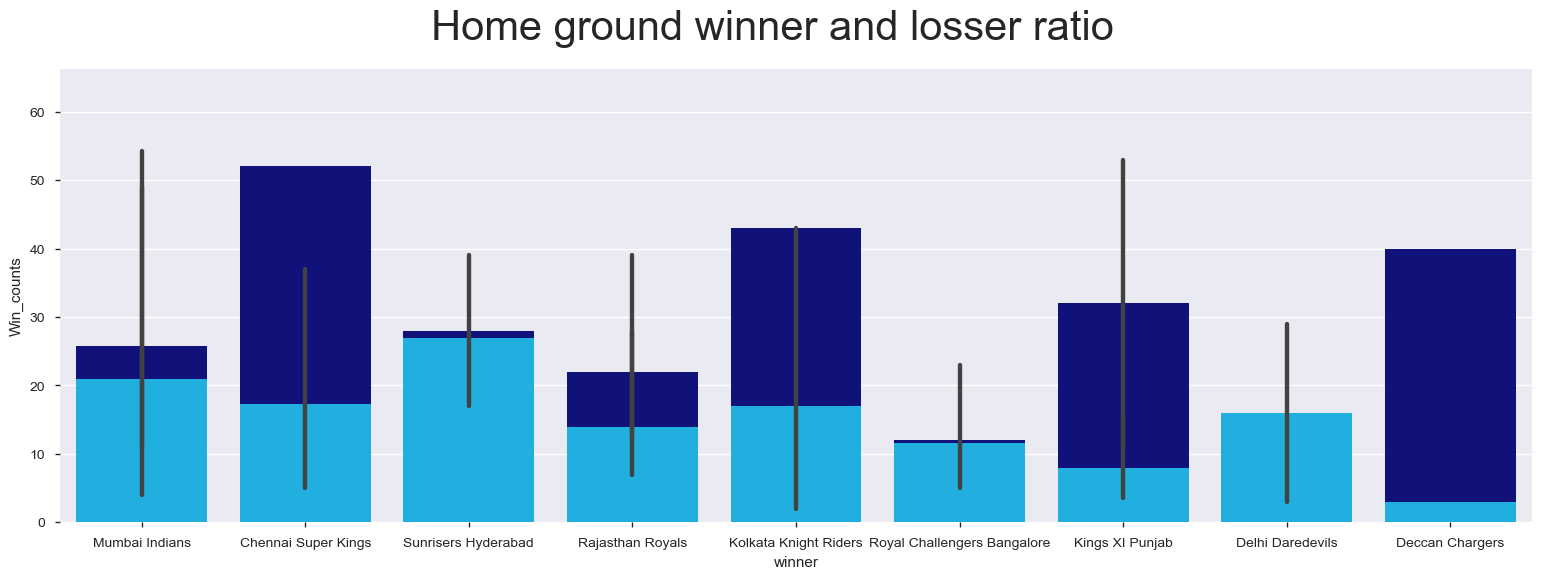

In [72]:
f,ax = plt.subplots(figsize=(19,6),dpi=100)
(sns.barplot(
    x="city",
    y = "played_counts",
    data = Teams_win_withincity.sort_values(by="wincitypercentage",ascending=False),
    color = "DarkBlue"
    ),
 sns.barplot(
     x="winner",
     y="Win_counts",
     data=Teams_win_withincity.sort_values(by="wincitypercentage",ascending=False),
     color='DeepSkyBlue'
     ))

f.suptitle("Home ground winner and losser ratio",fontsize=30)


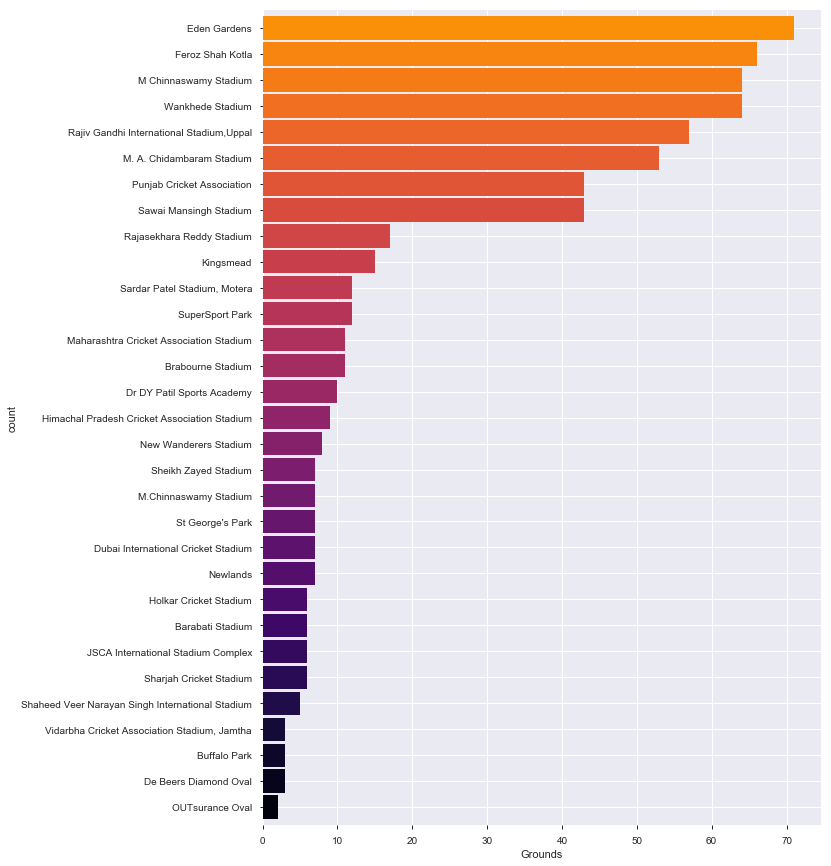

In [73]:
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

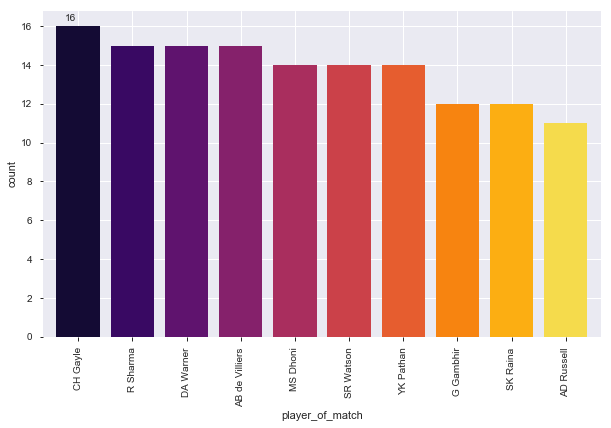

In [74]:
#top 10 max man of matches
plt.subplots(figsize=(10,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8,color=sns.color_palette('inferno',10)) #counts the values coreespnding
#to each batsman and then filters out the 10 batsman and then plots a bargraph
ax.set_xlabel('player_of_match')
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.25))
    plt.show()

In [75]:
matches.head()

,level_0,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Match_No
0,0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium,Uppal",Match_1
1,4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Match_5
2,6,6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Match_7
3,7,7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,Match_8
4,9,9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Match_10


In [76]:
Toss_desc_winning = matches.groupby(['toss_winner','toss_decision','winner']).size().reset_index(name='Winning_Count')
Toss_desc_winning = Toss_desc_winning[Toss_desc_winning.Winning_Count > 3]
Toss_desc_winning.sort_values(ascending = False,by = 'Winning_Count')

,toss_winner,toss_decision,winner,Winning_Count
73,Kolkata Knight Riders,field,Kolkata Knight Riders,34
125,Royal Challengers Bangalore,field,Royal Challengers Bangalore,30
90,Mumbai Indians,field,Mumbai Indians,29
0,Chennai Super Kings,bat,Chennai Super Kings,28
9,Chennai Super Kings,field,Chennai Super Kings,27
39,Delhi Daredevils,field,Delhi Daredevils,26
107,Rajasthan Royals,field,Rajasthan Royals,25
56,Kings XI Punjab,field,Kings XI Punjab,25
82,Mumbai Indians,bat,Mumbai Indians,22
98,Rajasthan Royals,bat,Rajasthan Royals,14


In [77]:
Toss_venue = matches.groupby(['toss_winner','toss_decision','city','winner']).size().reset_index(name='Winning_Count')
Toss_venue = Toss_venue[Toss_venue.Winning_Count > 3]
Toss_venue.sort_values(ascending = False,by = 'Winning_Count')

,toss_winner,toss_decision,city,winner,Winning_Count
268,Mumbai Indians,field,Mumbai,Mumbai Indians,16
7,Chennai Super Kings,bat,Chennai,Chennai Super Kings,15
216,Kolkata Knight Riders,field,Kolkata,Kolkata Knight Riders,15
243,Mumbai Indians,bat,Mumbai,Mumbai Indians,12
343,Royal Challengers Bangalore,field,Bangalore,Royal Challengers Bangalore,10
310,Rajasthan Royals,field,Jaipur,Rajasthan Royals,10
193,Kolkata Knight Riders,bat,Kolkata,Kolkata Knight Riders,8
89,Delhi Daredevils,bat,Delhi,Delhi Daredevils,7
110,Delhi Daredevils,field,Delhi,Delhi Daredevils,7
251,Mumbai Indians,field,Bangalore,Mumbai Indians,6


C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0.98, 'Home ground winner and losser ratio')

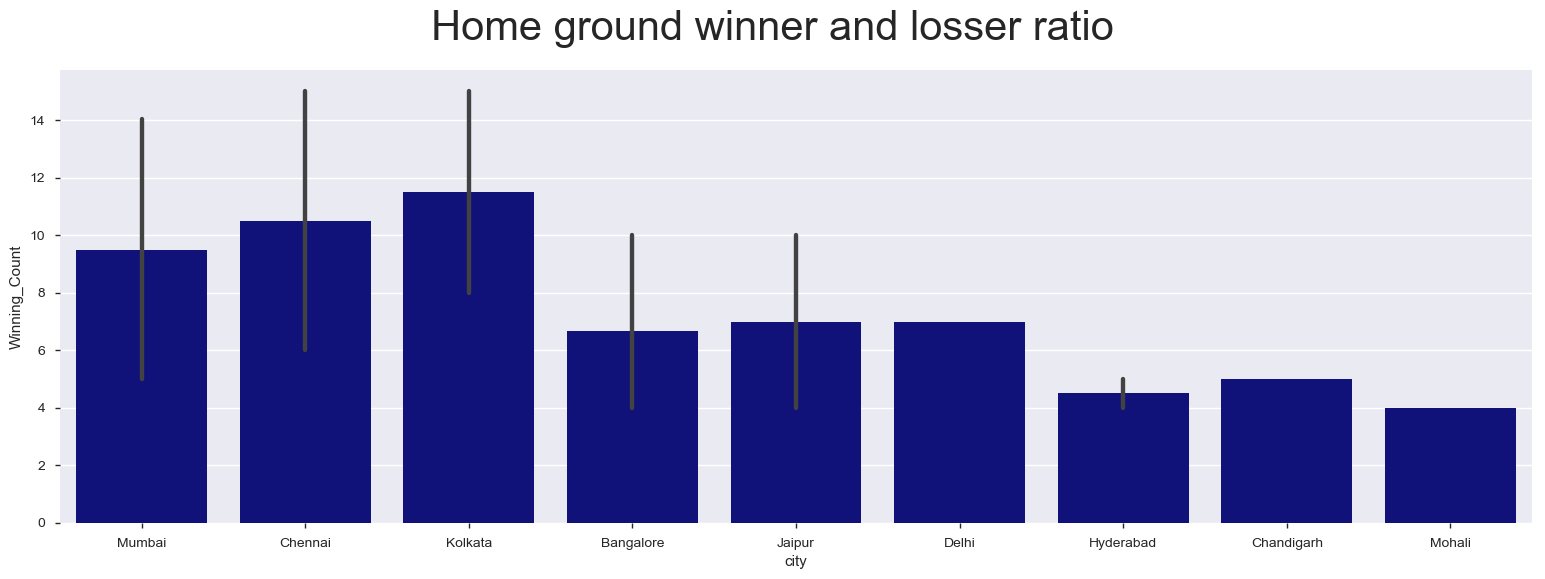

In [78]:
f,ax = plt.subplots(figsize=(19,6),dpi=100)
(sns.barplot(
    x="city",
    y = "Winning_Count",
    data =Toss_venue.sort_values(by="Winning_Count",ascending=False),
    color = "DarkBlue"
    ))
f.suptitle("Home ground winner and losser ratio",fontsize=30)

In [79]:
#Replacing the Team Names within their abbreviations

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
               ,['MI','KKR','RCB','SRH','CSK','RR','DC','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

delivery.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant',
                'Delhi Capitals']
               ,['MI','KKR','RCB','SRH','CSK','RR','DC','GL','KXIP','SRH','RPS','KTK','PW','RPS','DC'],inplace=True)


In [80]:
delivery.groupby(['batting_team']).size()

batting_team
CSK     19762
DC      20695
GL       3566
KKR     20858
KTK      1582
KXIP    20931
MI      22619
PW       5443
RCB     20908
RPS      3480
RR      17292
SRH     21942
dtype: int64

In [81]:
print('Total Matches Played:',matches.shape[0])
print(' \n Venues Played At:',matches['city'].unique())
print(' \n teams :',matches['team1'].unique())

Total Matches Played: 641
 
 Venues Played At: ['Hyderabad' 'Bangalore' 'Mumbai' 'Indore' 'Kolkata' 'Delhi' 'Chandigarh'
 'Jaipur' 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion'
 'East London' 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad'
 'Cuttack' 'Nagpur' 'Dharamsala' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' 'Dubai International Stadium' 'Mohali' 'Bengaluru']
 
 teams : ['SRH' 'RCB' 'KKR' 'KXIP' 'DC' 'MI' 'CSK' 'RR']


In [82]:
print('Total venues played at:',matches['city'].nunique())

Total venues played at: 30


In [83]:
print((matches['player_of_match'].value_counts()).idxmax(),' :has most man of the match awards')
print(((matches['winner']).value_counts()).idxmax(),' :has the highest number of the match wins')

CH Gayle  :has most man of the match awards
MI  :has the highest number of the match wins


In [84]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]


,season,team1,team2,winner,win_by_runs
22,2017,MI,DC,MI,146


In [85]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
17,2017,DC,KXIP,KXIP,10


In [86]:
print('Toss Decision in %\n',((matches['toss_decision']).value_counts()))

Toss Decision in %
 field    390
bat      251
Name: toss_decision, dtype: int64


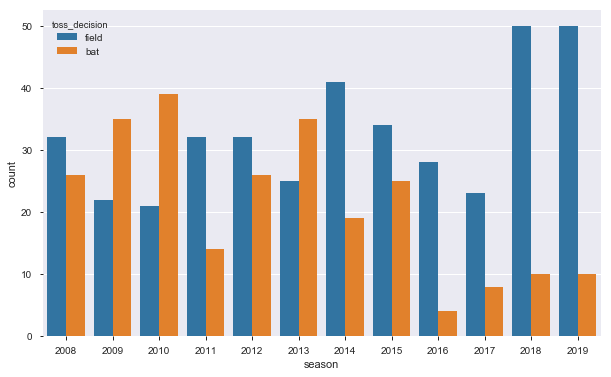

In [87]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

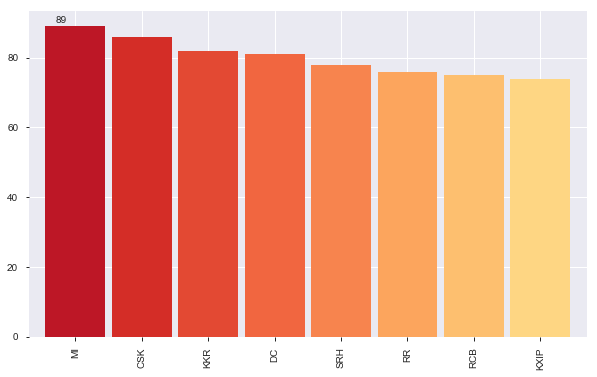

In [88]:
plt.subplots(figsize=(10,6))
ax = matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
    plt.show()

In [89]:
#toss winner matches
toss = pd.DataFrame(matches['toss_winner']==matches['winner'])
toss.groupby([0]).size()


0
False    312
True     329
dtype: int64

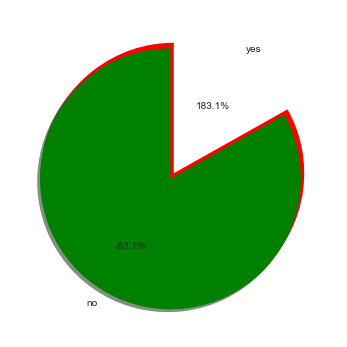

In [90]:
slices = [len(toss),(350-len(toss))]
labels = ['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [91]:
matches.head()

,level_0,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Match_No
0,0,0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium,Uppal",Match_1
1,4,4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,Match_5
2,6,6,7,2017,Mumbai,2017-04-09,KKR,MI,MI,field,normal,0,MI,0,4,N Rana,Wankhede Stadium,Match_7
3,7,7,8,2017,Indore,2017-04-10,RCB,KXIP,RCB,bat,normal,0,KXIP,0,8,AR Patel,Holkar Cricket Stadium,Match_8
4,9,9,10,2017,Mumbai,2017-04-12,SRH,MI,MI,field,normal,0,MI,0,4,JJ Bumrah,Wankhede Stadium,Match_10


In [92]:
#batsmen = matches[['id','season']].merge(delivery,left_on = 'id',right_on = 'match_id',how='left').drop('id',axis=1)
batsmen = pd.merge(matches,delivery,left_on = 'id',right_on = 'match_id',how = 'left').drop(['Match_No','date','result','dl_applied','level_0'],axis=1)
batsmen.head()
#pd.merge(Team1_total_matches,Team2_total_matches,how='outer',on='Team')

,index,id,season,city,team1,team2,toss_winner,toss_decision,winner,win_by_runs,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,35,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,35,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,35,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,35,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,35,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [93]:
batsmen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152059 entries, 0 to 152058
Data columns (total 34 columns):
index               152059 non-null int64
id                  152059 non-null int64
season              152059 non-null int64
city                152059 non-null object
team1               152059 non-null object
team2               152059 non-null object
toss_winner         152059 non-null object
toss_decision       152059 non-null object
winner              152059 non-null object
win_by_runs         152059 non-null int64
win_by_wickets      152059 non-null int64
player_of_match     152059 non-null object
venue               152059 non-null object
match_id            152059 non-null int64
inning              152059 non-null int64
batting_team        152059 non-null object
bowling_team        152059 non-null object
over                152059 non-null int64
ball                152059 non-null int64
batsman             152059 non-null object
non_striker         152059 non-null ob

In [94]:
print(matches.groupby(['team1']).size().reset_index(name='Count'))
#print(matches.groupby(['team2']).size().reset_index(name='Count'))

  team1  Count
0   CSK     83
1    DC     70
2   KKR     76
3  KXIP     83
4    MI     92
5   RCB     76
6    RR     64
7   SRH     97


In [95]:
mt1 = matches[((matches['team1']=='CSK')|(matches['team2']=='CSK'))&((matches['team1']=='MI')|(matches['team2']=='MI'))]
winn_match_perteam = mt1.groupby(['team1','team2','winner','season']).size().reset_index(name = 'Count')
winn_match_perteam.sort_values(ascending=True,by='season')

,team1,team2,winner,season,Count
0,CSK,MI,CSK,2008,1
4,CSK,MI,MI,2008,1
14,MI,CSK,MI,2009,1
10,MI,CSK,CSK,2009,1
1,CSK,MI,CSK,2010,2
5,CSK,MI,MI,2010,1
15,MI,CSK,MI,2011,1
2,CSK,MI,CSK,2012,1
6,CSK,MI,MI,2012,2
16,MI,CSK,MI,2013,3


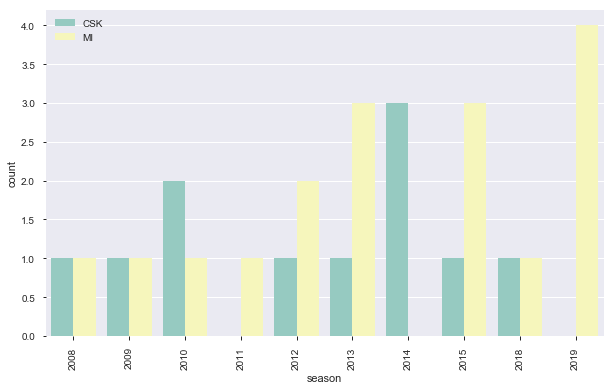

In [96]:
#Here we will check the matches played between 2 teams and which had won more matches each year
def team1_vs_team2(team1,team2):
    mt1 = matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season',hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg=plt.legend(loc = 'upper left')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
team1_vs_team2('CSK','MI')
            

In [97]:
batsmen = batsmen.replace(to_replace='Deccan Chargers',value='Sunrisers Hyderabad', regex=True)
batsmen = batsmen.replace(to_replace='Delhi Capitals',value='Delhi Daredevils',regex=True)
batsmen = batsmen.replace(to_replace='Rising Pune Supergiants',value='Rising Pune Suoergiant',regex=True)
batsmen = batsmen.replace(to_replace='Feroz Shah Kotla Ground',value='Feroz Shah Kotla',regex=True)
batsmen = batsmen.replace(to_replace='M.Chinnaswamy Stadium',value='M.Chinnaswamy Stadium',regex=True)
batsmen = batsmen.replace(to_replace='Rajiv Gandhi Intl. Cricket Stadium',value='Rajiv Gandhi Intl. Cricket Stadium,Uppal',regex=True)                          
batsmen = batsmen.replace(to_replace='M. A.Chidambaram Stadium',value='M. A.Chidambaram Stadium, Chepauk',regex=True)
batsmen = batsmen.replace(to_replace='M.Chinnaswamy Stadium',value='M.Chinnaswamy Stadium',regex=True)
batsmen = batsmen.replace(to_replace='Bengaluru',value='Bengaluru',regex=True)
batsmen.reset_index(inplace=True)

In [98]:
Team_exc = ['Rising Pune Supergiants','Gujarat Lions','Kochi Tuskets Kerala','Pune Warriors','Rising Pune Supergiant']
batsmen = batsmen[~batsmen["batting_team"].isin(Team_exc)]
batsmen = batsmen[~batsmen["bowling_team"].isin(Team_exc)]


In [99]:
#batsmen = batsmen[~batsmen["batsmen"].isin(player)]
len(batsmen)

152059

In [100]:
high_scores=batsmen.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores1 = high_scores[high_scores['total_runs'] >=200]
high_scores1.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
1139,7937,1,KKR,KXIP,250
358,206,1,CSK,RR,246
1267,11338,1,KKR,MI,241
64,61,1,CSK,KXIP,240
959,562,1,RCB,MI,235
1195,11147,1,SRH,RCB,233
490,296,1,KXIP,RCB,232
1269,11339,1,SRH,KXIP,232
448,259,1,DC,KXIP,231
806,486,1,KXIP,CSK,231


In [155]:
#200 + scores hitting teams and freq
batsmen.to_csv('batsmen.csv',index=False)
High_200 = high_scores.groupby(['batting_team','total_runs']).size().reset_index()
Top_200 = High_200.groupby(['batting_team']).size().reset_index()
Top_200.sort_values(ascending = False,by = 0)
                   

,batting_team,0
2,KKR,94
3,KXIP,94
5,RCB,93
1,DC,92
0,CSK,88
7,SRH,88
4,MI,85
6,RR,84


In [102]:
#team against 200 higher chances
high_scores1.nlargest(1,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
1139,7937,1,KKR,KXIP,250


In [103]:
high_scores.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'total_runs'], dtype='object')

In [104]:
#high.set_index(['match_id'],inplace=True)
high_scores.drop('match_id',inplace=True,axis=1)

In [105]:
high_no_vs = high_scores[high_scores['total_runs']>=200].groupby(['inning','batting_team','bowling_team']).count().reset_index()


In [106]:
high_no_vs.head()

,inning,batting_team,bowling_team,total_runs
0,1,CSK,DC,2
1,1,CSK,KKR,1
2,1,CSK,KXIP,2
3,1,CSK,MI,1
4,1,CSK,RCB,1


In [107]:
high_no_vs[high_no_vs.total_runs > 1].sort_values(ascending = False,by = 'total_runs')

,inning,batting_team,bowling_team,total_runs
23,1,MI,DC,5
30,1,RCB,KXIP,4
13,1,KKR,KXIP,4
41,1,SRH,RCB,3
40,1,SRH,KXIP,3
0,1,CSK,DC,2
52,2,KXIP,KKR,2
50,2,KXIP,CSK,2
49,2,KKR,RCB,2
45,2,CSK,RCB,2


In [108]:
balls = batsmen.groupby(['batsman'])['ball'].count().reset_index()
runs=batsmen.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='inner')
balls.rename(columns = {'ball':'balls','batsman_runs':'runs'},inplace=True)
balls = balls[balls.runs>500]

In [109]:
#No of six's and fours by each player
sixes = batsmen.groupby('batsman')['batsman_runs'].agg(lambda x : (x==6).sum()).reset_index()
fours = batsmen.groupby('batsman')['batsman_runs'].agg(lambda x : (x==4).sum()).reset_index()
sixes.rename(columns = {'batsman_runs' : 'No_of_sixes'},inplace = True)
fours.rename(columns = {'batsman_runs' : 'No_of_fours'},inplace = True)

In [110]:
#to call strike rate
balls['strike_rate'] = balls['runs']/balls['balls']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
balls.head()

,batsman,balls,runs,strike_rate,No_of_sixes,No_of_fours
0,A Symonds,763.0,955.0,125.163827,41,72
1,AB de Villiers,2648.0,3876.0,146.374622,176,320
2,AC Gilchrist,1486.0,2010.0,135.262450,91,231
3,AD Russell,791.0,1428.0,180.530973,117,98
4,AJ Finch,513.0,570.0,111.111111,19,51


In [111]:
compare=batsmen.groupby(["match_id","batsman"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')

In [112]:
balls.nlargest(10,'strike_rate')

,batsman,balls,runs,strike_rate,No_of_sixes,No_of_fours,batsman_runs
3,AD Russell,791.0,1428.0,180.530973,117,98,89
76,SP Narine,439.0,743.0,169.248292,43,82,76
67,RR Pant,939.0,1529.0,162.832801,79,131,130
29,HH Pandya,652.0,1018.0,156.134969,63,65,96
33,JC Buttler,815.0,1264.0,155.092025,55,126,96
27,GJ Maxwell,820.0,1261.0,153.780488,79,102,95
89,V Sehwag,1630.0,2413.0,148.036810,91,299,122
39,KH Pandya,541.0,797.0,147.319778,32,76,86
1,AB de Villiers,2648.0,3876.0,146.374622,176,320,133
36,KA Pollard,1814.0,2604.0,143.550165,165,169,87


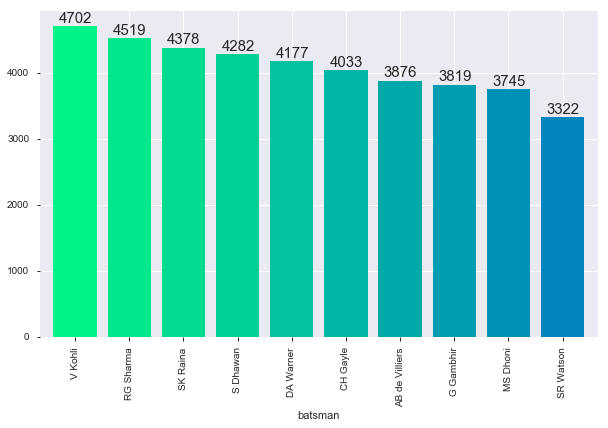

In [113]:
plt.subplots(figsize=(10,6))
max_runs = batsmen.groupby(['batsman'])['batsman_runs'].sum()
ax = max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.1,p.get_height()+50),fontsize=15)
plt.show()

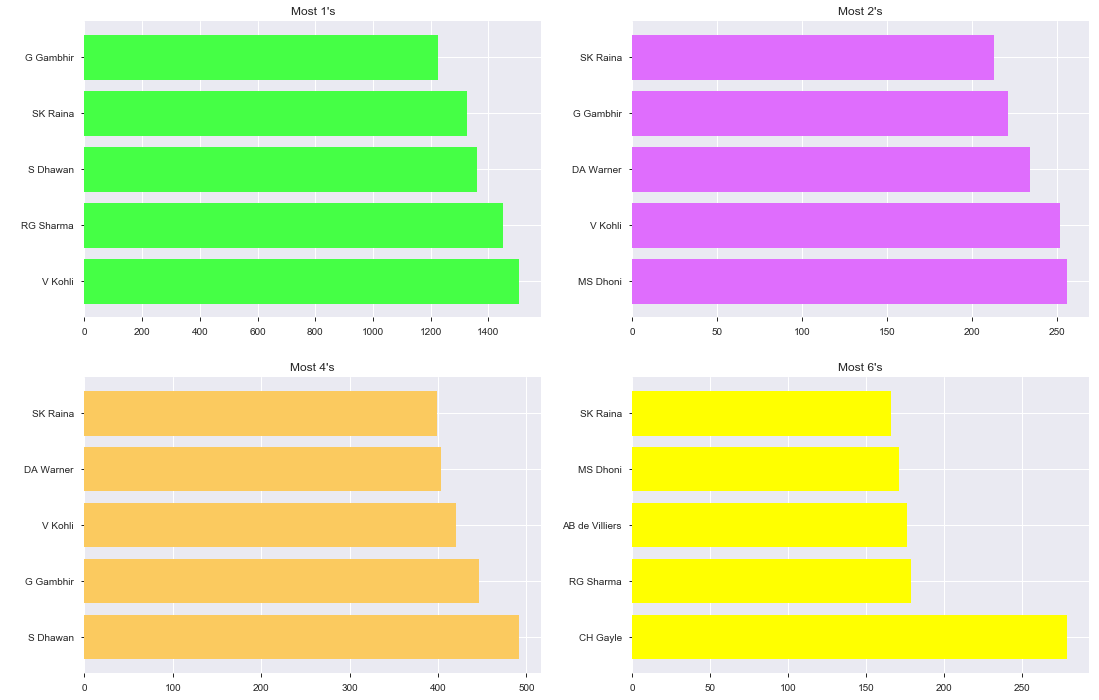

In [114]:
toppers1=batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers1.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel(' ')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel(' ')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel(' ')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel(' ')
plt.show()

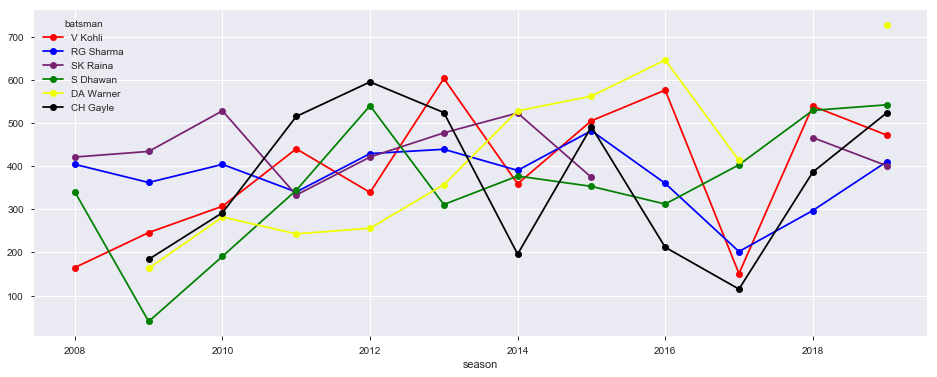

In [115]:
a = batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
a = a.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
a['Total'] = a.sum(axis=1)
a = a.sort_values(by = 'Total',ascending = 0)[:6]
a.drop('Total',axis=1,inplace=True)
a.T.plot(color=['red','blue','#772272','green','#f0ff00','black'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

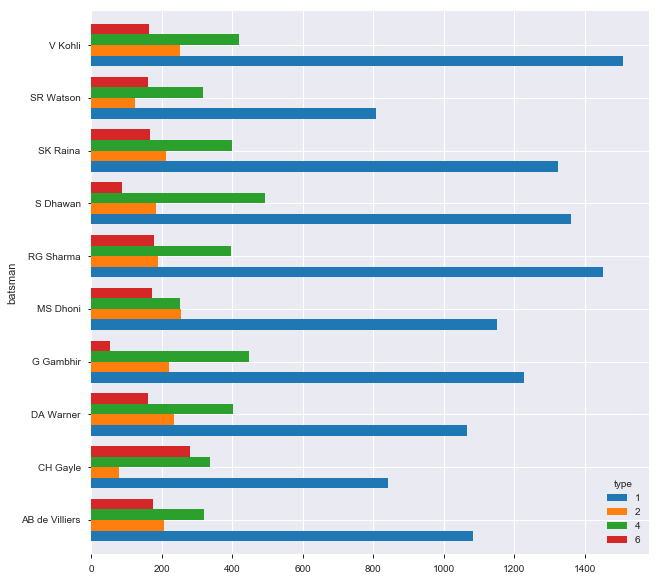

In [116]:
#top batsman performance

a = batsmen.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
b = max_runs.sort_values(ascending = False)[:10].reset_index()
c = b.merge(a, left_on = 'batsman', right_on ='batsman',how = 'left')
c.drop('batsman_runs_x',axis = 1,inplace= True)
c.set_index('batsman',inplace = True)
c.columns = ['type','count']
c = c[(c['type'] ==1)|(c['type'] ==2)| (c['type'] ==4)|(c['type'] ==6)]
cols = ['type','counts']
c.reset_index(inplace=True)
c = c.pivot('batsman','type','count')
c.plot.barh(width=0.8)
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [117]:
# who has taken most wickets of top batsman
ABD = batsmen[batsmen['batsman']=='AB de Villiers']
ABD = ABD[ABD['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
#ABD = ABD.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending = 0).disissal_kind[:5].reset_index()
ABD = ABD.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending =0).reset_index()
ABD  = ABD[['batsman','bowler','dismissal_kind']].query("dismissal_kind >2")
ABD['batsman']='AB de Villiers'
#print (ABD)

Gayle = batsmen[batsmen['batsman']=='CH Gayle']
Gayle = Gayle[Gayle['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
#ABD = ABD.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending = 0).disissal_kind[:5].reset_index()
Gayle= Gayle.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending =0).reset_index()
Gayle = Gayle[['batsman','bowler','dismissal_kind']].query("dismissal_kind >2")
Gayle['batsman']='CH Gayle'
#print (ABD)

da_warner = batsmen[batsmen['batsman']=='DA Warner']
da_warner = da_warner[da_warner['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
#ABD = ABD.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending = 0).disissal_kind[:5].reset_index()
da_warner = da_warner.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending =0).reset_index()
da_warner  = da_warner[['batsman','bowler','dismissal_kind']].query("dismissal_kind >2")
da_warner['batsman']='AB de Villiers'
#print (ABD)

v_kohli = batsmen[batsmen['batsman']=='V Kohli']
v_kohli = v_kohli[v_kohli['dismissal_kind'].isin(['caught','lbw','bowled','stumped','caught and bowled',"hit wicket"])]
#ABD = ABD.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending = 0).disissal_kind[:5].reset_index()
v_kohli = v_kohli.groupby('bowler').count().sort_values(by = 'dismissal_kind',ascending =0).reset_index()
v_kohli  = v_kohli[['batsman','bowler','dismissal_kind']].query("dismissal_kind >2")
v_kohli['batsman']='AB de Villiers'
#print (ABD)

Final = Gayle.append([da_warner,v_kohli])
Final.column = ['batsman','bowler','No_of_Dismissal_kind']
Final

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,batsman,bowler,dismissal_kind
0,CH Gayle,Harbhajan Singh,5
1,CH Gayle,Sandeep Sharma,4
2,CH Gayle,R Ashwin,4
3,CH Gayle,UT Yadav,4
4,CH Gayle,CH Morris,3
5,CH Gayle,SR Watson,3
6,CH Gayle,Z Khan,3
0,AB de Villiers,Harbhajan Singh,4
1,AB de Villiers,P Kumar,3
2,AB de Villiers,UT Yadav,3


In [118]:
orange = matches[['id','season']]
orange = orange.merge(delivery,left_on = 'id',right_on = 'match_id',how = 'left')
orange = orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange =orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
495,2011,CH Gayle,515
629,2012,CH Gayle,595
824,2013,MEK Hussey,728
989,2014,RV Uthappa,660
1049,2015,DA Warner,562
1173,2016,DA Warner,646
1273,2017,DA Warner,413


In [119]:
#orange caps
orange = batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange =orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")
orange.sort_values(by='season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
495,2011,CH Gayle,515
629,2012,CH Gayle,595
824,2013,MEK Hussey,728
989,2014,RV Uthappa,660
1049,2015,DA Warner,562
1173,2016,DA Warner,646
1273,2017,DA Warner,413


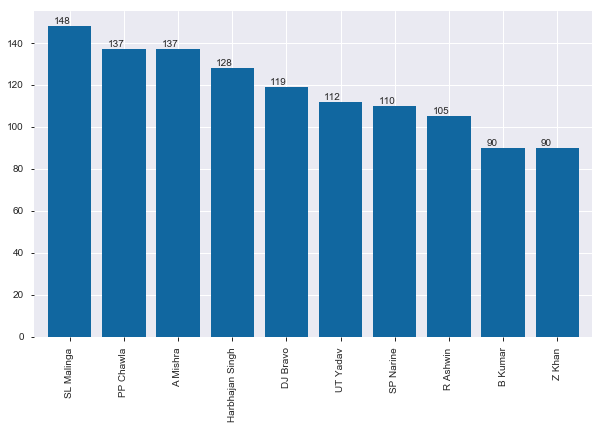

In [120]:
#bowler wickets
plt.subplots(figsize=(10,6))
dismissal_kinds = ["bowled","caught","lbw","stumped","caught and bowler","hit wicket"] #since run-out is not creditted to the bowler
ct = batsmen[batsmen["dismissal_kind"].isin(dismissal_kinds)]
ax = ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color='#1167a0')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.10,p.get_height()+1))
plt.show()

In [121]:
#economy rate
eco = batsmen.groupby(['bowler']).sum()
eco['total balls'] = batsmen['bowler'].value_counts()
eco['overs'] = (eco['total balls']//6)
#eco[eco['overs']>200].sort_values(by = 'overs',ascending = 0)['overs'].head(5).reset_index()
#eco
eco['economy'] = (eco['total_runs']/(eco['overs']))
eco[(eco['overs']>300)].sort_values('economy',ascending = 0)[:10].economy.reset_index()


,bowler,economy
0,UT Yadav,8.329114
1,DJ Bravo,8.260054
2,PP Chawla,7.956879
3,SR Watson,7.848875
4,IK Pathan,7.687898
5,P Kumar,7.629738
6,Z Khan,7.553571
7,B Kumar,7.473684
8,PP Ojha,7.445545
9,A Mishra,7.350000


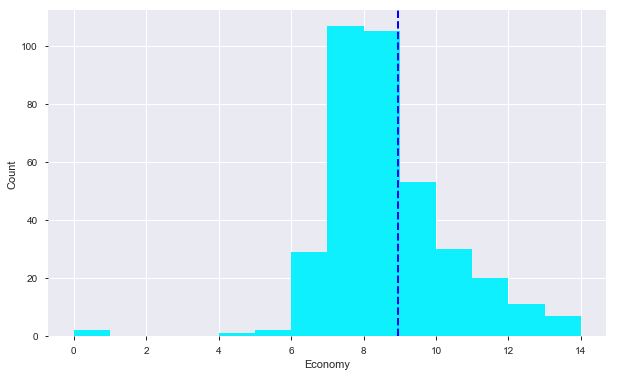

In [122]:
plt.subplots(figsize=(10,6))
eco.replace([np.inf, -np.inf],np.nan,inplace = True)
eco.fillna(0,inplace = True)
bins = range(0,15)
plt.hist(eco['economy'],bins,histtype = "bar",rwidth=1.2,color = '#0ff0ff')
plt.xlabel('Economy')
plt.ylabel('Count')
plt.axvline(eco["economy"].mean(), color = 'b',linestyle = 'dashed', linewidth=2)
plt.plot()
plt.show()

In [123]:
#purple caps
dismissal_kinds = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
purple = batsmen[batsmen['dismissal_kind'].isin(dismissal_kinds)]
#purple = purple.merge(matches,left_on = 'match',right_on = 'id',how = 'outer')
purple = purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple =purple.sort_values('dismissal_kind',ascending=0)
purple = purple.drop_duplicates('season',keep = 'first').sort_values(by = 'season')
purple.columns = [['season','bowler','Count_wickets']]
purple

,season,bowler,Count_wickets
75,2008,Sohail Tanvir,22
152,2009,RP Singh,23
241,2010,PP Ojha,21
345,2011,SL Malinga,21
430,2012,SP Narine,22
461,2013,DJ Bravo,29
579,2014,MM Sharma,23
635,2015,DJ Bravo,26
760,2016,YS Chahal,15
768,2017,B Kumar,21


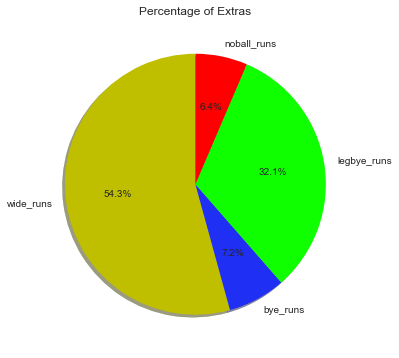

In [124]:
plt.subplots(figsize=(10,6))
extras = batsmen[['wide_runs','bye_runs','legbye_runs','noball_runs']].sum()
sizes = [5161,680,3056,612]
plt.pie(sizes, labels =['wide_runs','bye_runs','legbye_runs','noball_runs'],
       colors = ['Y','#1f2ff3','#0fff00','R'],explode=(0,0,0,0),autopct='%1.1f%%',shadow = True,startangle=90)
plt.title("Percentage of Extras")
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.plot()
plt.show()

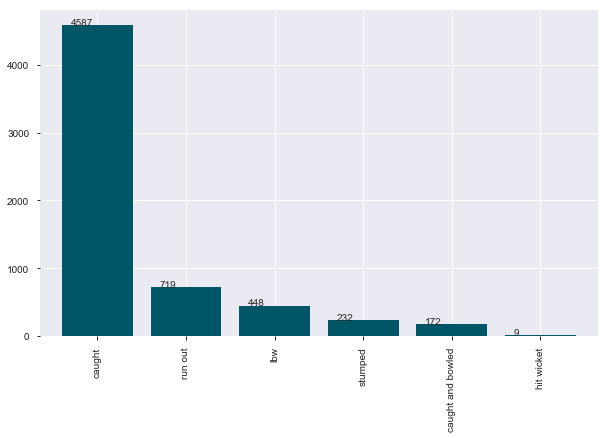

In [125]:
plt.subplots(figsize=(10,6))
dismiss = ["run out","caught","lbw","stumped","caught and bowled","hit wicket"]
ct = batsmen[batsmen["dismissal_kind"].isin(dismiss)]
ax = ct.dismissal_kind.value_counts()[:10].plot.bar(width=0.8,color='#005566')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.1,p.get_height()+1))
plt.show()

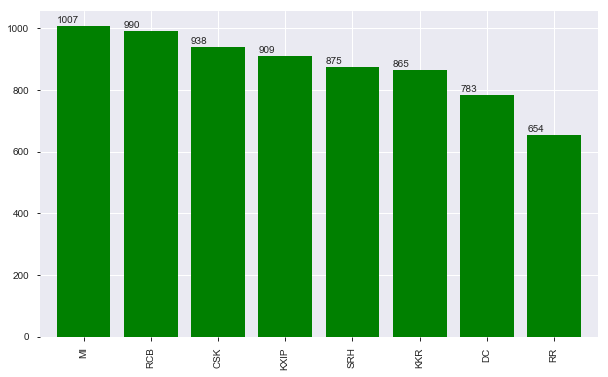

In [126]:
plt.subplots(figsize=(10,6))
ax = batsmen[batsmen['batsman_runs']==6].batting_team.value_counts().plot.bar(width=0.8,color='G')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x(),p.get_height()+10))
plt.show()    

In [127]:
#best economy rate in death over
death_over = batsmen.groupby(['match_id','inning','bowler','over'])['total_runs'].sum().reset_index()
death_over = death_over[death_over['over']>16]
death_over.head()
                                                                                                   

,match_id,inning,bowler,over,total_runs
3,1,1,A Choudhary,18,17
9,1,1,SR Watson,20,16
14,1,1,TS Mills,17,7
15,1,1,TS Mills,19,12
23,1,2,A Nehra,18,2


In [128]:
death_over = death_over.groupby('bowler').agg({'total_runs':['max','min','count','mean']}).reset_index()
death_over.head()

bowler total_runs                     
                         max min count       mean
0  A Ashish Reddy         15   2     9   8.222222
1      A Chandila          6   6     1   6.000000
2     A Choudhary         17   0     4  10.000000
3      A Flintoff         22   8     3  17.333333
4        A Joseph          5   5     1   5.000000

In [129]:
death_over.columns = death_over.columns.droplevel()
death_over.head()

,,max,min,count,mean
0,A Ashish Reddy,15,2,9,8.222222
1,A Chandila,6,6,1,6.000000
2,A Choudhary,17,0,4,10.000000
3,A Flintoff,22,8,3,17.333333
4,A Joseph,5,5,1,5.000000


In [130]:
death_over = death_over[death_over['count'] > 50].sort_values(by = 'mean',ascending =  True)
death_over.head()

,,max,min,count,mean
253,SL Malinga,20,0,147,7.993197
258,SP Narine,23,0,94,8.276596
58,CH Morris,20,2,72,8.763889
86,DW Steyn,24,1,80,8.775000
8,A Nehra,23,1,56,8.785714


In [131]:
#profile = batsmen.profile_report(title = 'Pandas Profiling Report')
#profile.to_file(output_file = "output.html")


In [132]:
#more ball faced
Batsman_ball_faced = batsmen.groupby(['batsman'])['ball'].count().reset_index().sort_values('ball',ascending = False)
Batsman_ball_faced_Top = Batsman_ball_faced.iloc[:15]
Batsman_ball_faced_Top

,batsman,ball
461,V Kohli,3677
348,RG Sharma,3487
372,S Dhawan,3464
406,SK Raina,3249
140,G Gambhir,3187
107,DA Warner,2985
88,CH Gayle,2838
275,MS Dhoni,2728
25,AB de Villiers,2648
50,AT Rayudu,2455


In [133]:
batsmen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152059 entries, 0 to 152058
Data columns (total 35 columns):
level_0             152059 non-null int64
index               152059 non-null int64
id                  152059 non-null int64
season              152059 non-null int64
city                152059 non-null object
team1               152059 non-null object
team2               152059 non-null object
toss_winner         152059 non-null object
toss_decision       152059 non-null object
winner              152059 non-null object
win_by_runs         152059 non-null int64
win_by_wickets      152059 non-null int64
player_of_match     152059 non-null object
venue               152059 non-null object
match_id            152059 non-null int64
inning              152059 non-null int64
batting_team        152059 non-null object
bowling_team        152059 non-null object
over                152059 non-null int64
ball                152059 non-null int64
batsman             152059 non-null obj

In [134]:
#dotballs
dotballs = batsmen[batsmen['extra_runs']==0].groupby(['batsman'])['batsman_runs'].agg(lambda x :(x==0).sum()).reset_index().sort_values('batsman_runs',ascending =True).reset_index(drop = True)
dotballs.columns = ['batsman','No_of_Balls']
dotballs.iloc[:10]

,batsman,No_of_Balls
0,B Stanlake,0
1,S Sharma,0
2,RG More,0
3,I Malhotra,0
4,CRD Fernando,0
5,DP Vijaykumar,0
6,KMDN Kulasekara,0
7,DAJ Bracewell,1
8,DNT Zoysa,1
9,AF Milne,1


In [135]:
#dot balls greater than 300 overs
Percentage_of_dot_balls = pd.merge(Batsman_ball_faced,dotballs,on = "batsman",how = 'outer')
Percentage_of_dot_balls["Percent of dot balls"] = (Percentage_of_dot_balls["No_of_Balls"]/Percentage_of_dot_balls["ball"])*100
Percentage_of_dot_balls=Percentage_of_dot_balls[Percentage_of_dot_balls["ball"]>300].reset_index(drop=True)
Percentage_of_dot_balls_top=Percentage_of_dot_balls.sort_values(by="Percent of dot balls",ascending= False).reset_index(drop=True).iloc[:15,:]
Percentage_of_dot_balls_top.iloc[:20]

,batsman,ball,No_of_Balls,Percent of dot balls
0,PC Valthaty,388,183.0,47.164948
1,CA Pujara,403,178.0,44.168734
2,SC Ganguly,977,422.0,43.193449
3,E Lewis,343,147.0,42.857143
4,MS Bisla,704,301.0,42.755682
5,NV Ojha,1256,532.0,42.356688
6,HH Gibbs,837,354.0,42.293907
7,DR Smith,1418,591.0,41.678420
8,CJ Anderson,405,168.0,41.481481
9,ST Jayasuriya,573,236.0,41.186736


In [136]:
#no of centuries
batsman_scores_match =batsmen.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = 'runs')
batsman_scores_match = batsman_scores_match[batsman_scores_match['runs']>100].groupby(['batsman'])['match_id'].count().reset_index(name = 'no_of_centuries').sort_values('no_of_centuries',ascending=False).reset_index(drop = True).iloc[:10]
batsman_scores_match

,batsman,no_of_centuries
0,CH Gayle,6
1,DA Warner,4
2,SR Watson,4
3,M Vijay,2
4,KL Rahul,2
5,AC Gilchrist,2
6,AM Rahane,2
7,V Sehwag,2
8,AB de Villiers,2
9,RG Sharma,1


In [137]:
batsman_scores_half_match = batsmen.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = 'runs')
batsman_scores_half_match = batsman_scores_half_match[batsman_scores_half_match['runs'] >=50].groupby(['batsman'])['match_id'].count().reset_index(name = 'no_of_half_centuries').sort_values('no_of_half_centuries',ascending = False).reset_index(drop = True).iloc[:10]
batsman_scores_half_match

,batsman,no_of_half_centuries
0,DA Warner,43
1,V Kohli,36
2,S Dhawan,35
3,RG Sharma,34
4,AB de Villiers,32
5,G Gambhir,31
6,SK Raina,31
7,CH Gayle,31
8,MS Dhoni,21
9,SR Watson,21


In [138]:
#matches player dismissed
No_Matches_player_dismissed = batsmen[["match_id","player_dismissed"]]
No_Matches_player_dismissed = No_Matches_player_dismissed.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by = "match_id",ascending=False).reset_index(drop=True)
No_Matches_player_dismissed.columns = ["batsman","No_of_Matches"]
No_Matches_player_dismissed.head(5)

,batsman,No_of_Matches
0,RG Sharma,143
1,SK Raina,131
2,V Kohli,130
3,S Dhawan,126
4,G Gambhir,123


In [139]:
#Consistency of batsman
Batsman_score = batsmen.groupby('batsman')["batsman_runs"].agg(sum).reset_index().sort_values(by = "batsman_runs",ascending=False).reset_index(drop=True)
Batsman_Average = pd.merge(Batsman_score,No_Matches_player_dismissed,on = "batsman")
#merging the score and match played by batsman
Batsman_Average = Batsman_Average[Batsman_Average["batsman_runs"]>500]
#taking average for those player for having more than 500 runs under their belt
Batsman_Average["Average"]=(Batsman_Average["batsman_runs"]/Batsman_Average["No_of_Matches"])
Batsman_Average=Batsman_Average.sort_values(by="Average",ascending=False).reset_index(drop=True)
Batsman_Average.iloc[:20,:]

,batsman,batsman_runs,No_of_Matches,Average
0,MS Dhoni,3745,83,45.120482
1,LMP Simmons,1063,24,44.291667
2,KL Rahul,1917,44,43.568182
3,KS Williamson,1256,30,41.866667
4,DA Warner,4177,100,41.770000
5,SE Marsh,2247,55,40.854545
6,MEK Hussey,1862,46,40.478261
7,CH Gayle,4033,100,40.330000
8,JP Duminy,1849,46,40.195652
9,JC Buttler,1264,32,39.500000


In [140]:
#no of dot ball bowled by bowler
Bowler_dotball = batsmen.groupby("bowler")["total_runs"].agg(lambda x:(x==0).sum()).reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_dotball.columns = ["bowler","No_of_balls"]
Bowler_dotball_Top = Bowler_dotball.iloc[:10]
Bowler_dotball_Top

,bowler,No_of_balls
0,Harbhajan Singh,1140
1,SL Malinga,1035
2,PP Chawla,1019
3,A Mishra,1007
4,SP Narine,927
5,DW Steyn,923
6,R Ashwin,906
7,UT Yadav,864
8,P Kumar,835
9,Z Khan,787


In [141]:
#extra balls bowled by bowler
Bowler_extraball = batsmen.groupby("bowler")["extra_runs"].agg(lambda x :(x>0).sum()).reset_index().sort_values(by = "extra_runs",ascending=False).reset_index(drop=True)
Bowler_extraball.columns=["bowler","No_of_balls"]
Bowler_extraball_Top = Bowler_extraball.iloc[:15]
Bowler_extraball_Top

,bowler,No_of_balls
0,SL Malinga,196
1,UT Yadav,160
2,DJ Bravo,151
3,P Kumar,142
4,I Sharma,138
5,SR Watson,132
6,DW Steyn,132
7,Harbhajan Singh,120
8,Z Khan,117
9,JA Morkel,112


In [142]:
#runs given by bowler
Bowler_Runs = batsmen.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)
Bowler_Runs.columns = ["bowler","Total_runs_given"]
Bowler_Runs_Top = Bowler_Runs.iloc[:10]
Bowler_Runs_Top

,bowler,Total_runs_given
0,PP Chawla,3875
1,Harbhajan Singh,3760
2,A Mishra,3528
3,UT Yadav,3290
4,SL Malinga,3200
5,DJ Bravo,3081
6,R Ashwin,2873
7,SP Narine,2657
8,P Kumar,2617
9,R Vinay Kumar,2544


In [143]:
#wicket keeper analysis
Wicket_Keepers = batsmen[batsmen["dismissal_kind"]=="stumped"][["fielder"]]
Wicket_Keepers = Wicket_Keepers.drop_duplicates().reset_index(drop=True) 
Wicket_Keepers 

,fielder
0,RR Pant
1,RV Uthappa
2,WP Saha
3,KM Jadhav
4,Vishnu Vinod
5,PA Patel
6,MV Boucher
7,Kamran Akmal
8,SP Goswami
9,YV Takawale


In [144]:
Wicket_keeper_data = pd.merge(batsmen,Wicket_Keepers,on="fielder")
Wicket_keeper_data

,level_0,index,id,season,city,team1,team2,toss_winner,toss_decision,winner,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,3,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,5,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,6,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,7,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,8,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,9,0,1,2017,Hyderabad,SRH,RCB,RCB,field,SRH,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [145]:
Wicket_keeper_Stumps = Wicket_keeper_data.groupby("fielder")["dismissal_kind"].agg(lambda x: (x=="stumped").sum()).reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop=True)
Wicket_keeper_Stumps.columns = ["Wicket_Keeper","Stumps"]
Wicket_keeper_Stumps

,Wicket_Keeper,Stumps
0,MS Dhoni,30
1,KD Karthik,25
2,RV Uthappa,21
3,AC Gilchrist,16
4,WP Saha,15
5,PA Patel,13
6,NV Ojha,10
7,RR Pant,9
8,KC Sangakkara,9
9,Q de Kock,7


In [146]:
Wicket_keeper_Stumps = Wicket_keeper_data.groupby("fielder")["dismissal_kind"].agg(lambda x :(x=="stumped").sum()).reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop =True)
Wicket_keeper_Stumps.columns = ["Wicket_keeper","Stumps"]
Wicket_keeper_Stumps

,Wicket_keeper,Stumps
0,MS Dhoni,30
1,KD Karthik,25
2,RV Uthappa,21
3,AC Gilchrist,16
4,WP Saha,15
5,PA Patel,13
6,NV Ojha,10
7,RR Pant,9
8,KC Sangakkara,9
9,Q de Kock,7


In [147]:
Wicket_keeper_Catches = Wicket_keeper_data.groupby("fielder")["dismissal_kind"].agg(lambda x :(x=="caught").sum()).reset_index().sort_values(by="dismissal_kind",ascending=False).reset_index(drop =True)
Wicket_keeper_Catches.columns = ["Wicket_keeper","No_of_catches"]
Wicket_keeper_Catches

,Wicket_keeper,No_of_catches
0,KD Karthik,89
1,AB de Villiers,80
2,MS Dhoni,77
3,RV Uthappa,57
4,WP Saha,55
5,NV Ojha,55
6,PA Patel,54
7,AT Rayudu,47
8,AC Gilchrist,46
9,SV Samson,41


In [148]:
allBatEntries = list(batsmen['batsman'])
allBowEntries = list(batsmen['bowler'])
AllRunsScored = list(batsmen['batsman_runs'])
allDismissals = list(batsmen['player_dismissed'])
allMatchList = list(batsmen['match_id'])


In [149]:
#calculating order of batsman
order = batsmen[['inning','match_id','season','batsman','bowler','non_striker','over','ball','batting_team','bowling_team','player_dismissed']]
order = order.drop_duplicates(subset = ['season','match_id','batsman','non_striker','player_dismissed'])
order = order.drop_duplicates(subset = ['season','match_id','batsman','non_striker'],keep = 'last')
#order  = order.drop_duplicates(subset = ['season','match_id','batsman','non_striker'])
order = order.sort_values(['season','match_id'],ascending=True)
order.head(20)

,inning,match_id,season,batsman,bowler,non_striker,over,ball,batting_team,bowling_team,player_dismissed
7200,1,60,2008,BB McCullum,P Kumar,SC Ganguly,1,2,KKR,RCB,NaN
7232,1,60,2008,SC Ganguly,Z Khan,BB McCullum,6,2,KKR,RCB,SC Ganguly
7237,1,60,2008,BB McCullum,AA Noffke,RT Ponting,7,1,KKR,RCB,NaN
7273,1,60,2008,RT Ponting,JH Kallis,BB McCullum,13,1,KKR,RCB,RT Ponting
7274,1,60,2008,BB McCullum,JH Kallis,DJ Hussey,13,2,KKR,RCB,NaN
7305,1,60,2008,DJ Hussey,AA Noffke,BB McCullum,18,1,KKR,RCB,DJ Hussey
7306,1,60,2008,BB McCullum,AA Noffke,Mohammad Hafeez,18,2,KKR,RCB,NaN
7307,1,60,2008,Mohammad Hafeez,AA Noffke,BB McCullum,18,3,KKR,RCB,NaN
7324,2,60,2008,W Jaffer,AB Dinda,R Dravid,1,2,RCB,KKR,NaN
7330,2,60,2008,R Dravid,I Sharma,W Jaffer,2,1,RCB,KKR,R Dravid


In [150]:
order['Batsmen_Order'] = order.groupby(['match_id','inning','batting_team','batsman']).cumcount()


In [151]:
order1 = order[order.Batsmen_Order <1]
order1.head(5)

,inning,match_id,season,batsman,bowler,non_striker,over,ball,batting_team,bowling_team,player_dismissed,Batsmen_Order
7200,1,60,2008,BB McCullum,P Kumar,SC Ganguly,1,2,KKR,RCB,NaN,0
7232,1,60,2008,SC Ganguly,Z Khan,BB McCullum,6,2,KKR,RCB,SC Ganguly,0
7273,1,60,2008,RT Ponting,JH Kallis,BB McCullum,13,1,KKR,RCB,RT Ponting,0
7305,1,60,2008,DJ Hussey,AA Noffke,BB McCullum,18,1,KKR,RCB,DJ Hussey,0
7307,1,60,2008,Mohammad Hafeez,AA Noffke,BB McCullum,18,3,KKR,RCB,NaN,0


In [152]:
order1['Batsmen_Order'] = order1.groupby(['match_id','inning']).cumcount()
order1.head(5)

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,inning,match_id,season,batsman,bowler,non_striker,over,ball,batting_team,bowling_team,player_dismissed,Batsmen_Order
7200,1,60,2008,BB McCullum,P Kumar,SC Ganguly,1,2,KKR,RCB,NaN,0
7232,1,60,2008,SC Ganguly,Z Khan,BB McCullum,6,2,KKR,RCB,SC Ganguly,1
7273,1,60,2008,RT Ponting,JH Kallis,BB McCullum,13,1,KKR,RCB,RT Ponting,2
7305,1,60,2008,DJ Hussey,AA Noffke,BB McCullum,18,1,KKR,RCB,DJ Hussey,3
7307,1,60,2008,Mohammad Hafeez,AA Noffke,BB McCullum,18,3,KKR,RCB,NaN,4


In [153]:
order1[(order1['Batsmen_Order'] ==4) & (order1['batting_team']=='RCB') & (order['season']==2019)].head(50)


C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,inning,match_id,season,batsman,bowler,non_striker,over,ball,batting_team,bowling_team,player_dismissed,Batsmen_Order
137779,1,11137,2019,S Hetmyer,Harbhajan Singh,PA Patel,8,6,RCB,CSK,S Hetmyer,4
139405,2,11143,2019,S Hetmyer,JJ Bumrah,AB de Villiers,17,1,RCB,MI,S Hetmyer,4
140318,2,11147,2019,M Ali,Mohammad Nabi,V Kohli,4,5,RCB,SRH,NaN,4
140978,1,11150,2019,MP Stoinis,S Gopal,PA Patel,11,2,RCB,RR,NaN,4
141768,1,11153,2019,M Ali,P Krishna,MP Stoinis,20,1,RCB,KKR,NaN,4
142469,1,11311,2019,M Ali,S Lamichhane,V Kohli,15,3,RCB,DC,M Ali,4
145129,1,11322,2019,MP Stoinis,SL Malinga,AB de Villiers,18,5,RCB,MI,MP Stoinis,4
146085,1,11326,2019,MP Stoinis,H Gurney,V Kohli,17,1,RCB,KKR,NaN,4
147023,1,11330,2019,MP Stoinis,RA Jadeja,PA Patel,13,6,RCB,CSK,NaN,4
147731,1,11333,2019,AD Nath,H Viljoen,AB de Villiers,9,6,RCB,KXIP,AD Nath,4


In [154]:
order1.to_csv('Batsman_order.csv',index=False)